In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
#显示负数
plt.rcParams['axes.unicode_minus'] = False

## 读取listings文件，查看其数据

In [3]:
listings = pd.read_csv('listings.csv')
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
2,128496,Heart of Beijing: House with View 2,467520,Cindy,NaN,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
3,161902,cozy studio in center of Beijing,707535,Robert,NaN,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
4,162144,"nice studio near subway, sleep 4",707535,Robert,NaN,朝阳区 / Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28452 entries, 0 to 28451
Data columns (total 16 columns):
id                                28452 non-null int64
name                              28451 non-null object
host_id                           28452 non-null int64
host_name                         28452 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     28452 non-null object
latitude                          28452 non-null float64
longitude                         28452 non-null float64
room_type                         28452 non-null object
price                             28452 non-null int64
minimum_nights                    28452 non-null int64
number_of_reviews                 28452 non-null int64
last_review                       17294 non-null object
reviews_per_month                 17294 non-null float64
calculated_host_listings_count    28452 non-null int64
availability_365                  28452 non-null int64
dt

本表中，一共有16个字段，分别代表：  
**id**：酒店的id，**name**：酒店名，**host_id**：户主id，**host_name**：户主名  
**neighbourhood_group**：行政区所属省份，**neighbourhood**：行政区，**latitude**：纬度，**longitude**：经度  
**room_type**：房间类型，**price**：房间价格，**minimum_nights**：要求的最低居住天数，**number_of_reviews**：评论数  
**last_review**：最近一次评论时间，**reviews_per_month**：平均每月评论数，**calculated_host_listings_count**：有多少间房，**availability_365**：一年可用天数

## 数据清洗

In [5]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.845200e+04,2.845200e+04,0.0,28452.000000,28452.000000,28452.000000,28452.000000,28452.000000,17294.000000,28452.000000,28452.000000
mean,2.628583e+07,1.442821e+08,NaN,39.983225,116.442000,611.203325,2.729685,7.103156,1.319757,12.818290,220.342120
std,6.403312e+06,7.057051e+07,NaN,0.186984,0.204796,1623.535077,17.920932,16.815067,1.581243,29.261321,138.430677
min,4.405400e+04,1.928750e+05,NaN,39.455810,115.473390,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.245616e+07,8.708958e+07,NaN,39.897330,116.355283,235.000000,1.000000,0.000000,0.290000,2.000000,87.000000
50%,2.787765e+07,1.525464e+08,NaN,39.930905,116.434665,389.000000,1.000000,1.000000,0.800000,5.000000,209.000000
75%,3.134482e+07,2.061464e+08,NaN,39.990470,116.491122,577.000000,1.000000,6.000000,1.750000,11.000000,361.000000
max,3.395441e+07,2.563498e+08,NaN,40.949660,117.495270,68983.000000,1125.000000,322.000000,20.000000,222.000000,365.000000


- 查看统计结果发现
  - 北京爱彼迎的公寓价格，最少为0元，最多为68983元，平均价格为611元
  - 平均要求住宿的天数大约为3天，最少1天，3/4位数为1天，表明绝大多数的公寓，并无最低居住天数的要求
  - 每个公寓酒店平均有13间房可供出租，最少1间，中位数为2，表明大多数公寓可提供的住房较少
- 字段清洗说明
  - **neighbourhood_group**字段，全为空值，可以删除该字段
  - **price**字段，最低0元，免费住，可能是活动促销或者优惠券等情况？最高68983元，看行政区为北京，这种高价应该也是存在的，所以均视为正常值。。
  - **availability_365**字段，最低有0天的，也就是说一年都不开业，此种情况应当删除
  - 其他字段均处于合理值范围内
  - 另外：**neighbourhood**字段，有中英文两种显示，为了美观，可以把英文的后缀去掉  


In [6]:
listings = listings.drop(['neighbourhood_group'],axis=1)

In [7]:
listings.loc[listings['availability_365'] == 0,'id'].count()

2622

统计全年不开业的酒店，有**2622**个，鉴于数量较大，对其他字段数据的分析也占有一定的份量，因此，不删除这些信息，改为将**availability_365**设为空值的方式

In [8]:
listings.loc[listings['availability_365'] == 0,'availability_365'] = np.NAN

In [9]:
#Series.str.split()方法：以某个字符来切割字符串，expand=True表示返回DataFrame，False（默认）表示返回Series
listings['neighbourhood'] = listings['neighbourhood'].str.split('/',expand=True)[0]
#Series.str.strip()方法：去掉头尾指定字符，默认空格
listings['neighbourhood'] = listings['neighbourhood'].str.strip(to_strip = None)

In [10]:
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,朝阳区,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341.0
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,密云县,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,NaN
2,128496,Heart of Beijing: House with View 2,467520,Cindy,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93.0
3,161902,cozy studio in center of Beijing,707535,Robert,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290.0
4,162144,"nice studio near subway, sleep 4",707535,Robert,朝阳区,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352.0


## 数据分析

- 首先对经纬度数据进行判断，此处我是用PowerBI绘制经纬分布图，可知数据准确，全部分布在北京市范围内

![jupyter](./map1.png)

- 爱彼迎的民宿公寓在北京各区的分布情况

In [11]:
grouped_neighbourhood = listings.groupby('neighbourhood').agg('count')
grouped_neighbourhood

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,,
东城区,3346,3346,3346,3346,3346,3346,3346,3346,3346,3346,2445,2445,3346,3055
丰台区,1758,1758,1758,1758,1758,1758,1758,1758,1758,1758,997,997,1758,1625
大兴区,823,823,823,823,823,823,823,823,823,823,447,447,823,771
密云县,935,935,935,935,935,935,935,935,935,935,369,369,935,881
平谷区,143,143,143,143,143,143,143,143,143,143,51,51,143,128
延庆县,718,718,718,718,718,718,718,718,718,718,215,215,718,698
怀柔区,833,833,833,833,833,833,833,833,833,833,305,305,833,799
房山区,579,578,579,579,579,579,579,579,579,579,273,273,579,554
昌平区,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034,532,532,1034,910


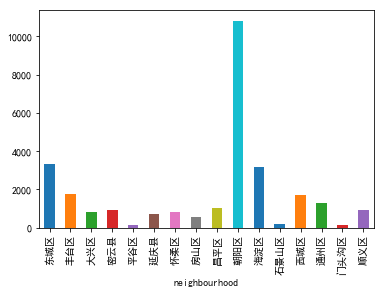

In [12]:
grouped_neighbourhood.id.plot.bar()

由上图可知，公寓主要集中在朝阳、东城、海淀三个区，在平谷、石景山、门头沟三个区分布最少，这也符合北京市各区的人流量以及经济发展形势

- 房间类型分析

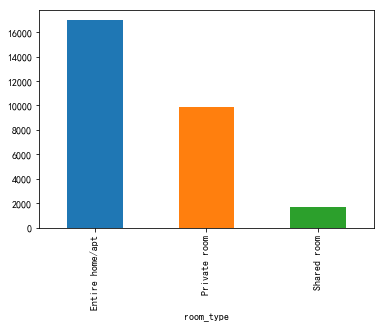

In [13]:
listings.groupby('room_type').count().id.plot.bar()

爱彼迎的房间以套间和单间为主，合租的房间较少

- 价格

In [14]:
listings.loc[listings.price > 0].min().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12
index,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,44054,192875,(Hidden By Airbnb) 乐乐,东城区,39.4558,115.473,Entire home/apt,27,1,0,0.01,1,1


In [15]:
listings.loc[listings.price > 0].max().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12
index,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,33954414,256349804,｢祝我佳｣,顺义区,40.9497,117.495,Shared room,68983,1125,322,20,222,365


分析可知，最便宜的公寓为一个叫“乐乐”的公寓，价格为27元，最贵的为一个叫“祝我佳”的公寓，价格为68983元

In [16]:
data1 = listings.loc[listings.price > 0]
data1.pivot_table(
    index = 'neighbourhood',
    values = 'price',
    aggfunc = ['min','max']
).T

,neighbourhood,东城区,丰台区,大兴区,密云县,平谷区,延庆县,怀柔区,房山区,昌平区,朝阳区,海淀区,石景山区,西城区,通州区,门头沟区,顺义区
min,price,67,67,67,47,81,67,81,67,47,34,27,87,60,60,67,60
max,price,65970,9998,30002,49999,8978,8891,28499,68828,67909,67104,68983,1778,16977,34699,8301,33471


各行政区最便宜/最贵价格如上

In [17]:
def price_tag(x):
    if x <= 100:
        return '0-100'
    elif x > 100 and x <= 200:
        return '100-200'
    elif x > 200 and x <= 300:
        return '200-300'
    elif x > 300 and x <= 400:
        return '300-400'
    elif x > 400 and x <= 500:
        return '400-500'
    else:
        return '500+'

In [18]:
listings['price_tag'] = listings.loc[listings.price > 0,'price'].apply(price_tag)

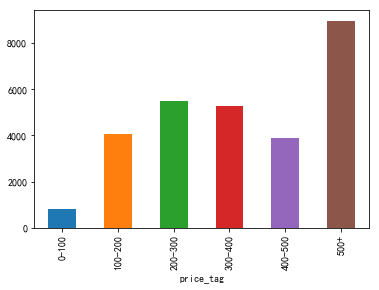

In [19]:
listings.groupby('price_tag').count().id.plot.bar()

可以看出，价格在100元以下的公寓最少，大部分的租房价格保持在100 - 500元之间，500元以上的住房也较多，这也得益于北京较高的消费水平

- 关于房东

In [20]:
listings.groupby(['host_id','host_name']).agg('count').id.sort_values(ascending=False).head(10)

host_id    host_name
209669028  美婷           222
54436429   兴伟           210
156249912  海梅           115
17619297   Cathy         98
156143513  金桔精品民宿        77
160411460  海波            72
196377840  奇遇公寓          66
20788084   开心短租公寓        66
67553380   晓雷            64
160674938  筱竹            62
Name: id, dtype: int64

In [21]:
listings.loc[listings.host_id == 209669028].groupby('neighbourhood').id.count()

neighbourhood
东城区     44
朝阳区    178
Name: id, dtype: int64

北京爱彼迎排名前十的大房东如上，以拥有房产最多的‘美婷’为例，其一共有222套公寓，东城区有44套，朝阳区有178套

In [22]:
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_tag
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,朝阳区,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341.0,500+
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,密云县,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,NaN,500+
2,128496,Heart of Beijing: House with View 2,467520,Cindy,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93.0,300-400
3,161902,cozy studio in center of Beijing,707535,Robert,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290.0,300-400
4,162144,"nice studio near subway, sleep 4",707535,Robert,朝阳区,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352.0,500+


## 查看calendar表

In [23]:
calendar = pd.read_csv('calendar_detail.csv')

In [24]:
calendar.head()

,ID,date,available,price,adjustP,minday,maxday
0,1165040,2019/4/17,f,$511.00,$511.00,1,1125
1,1165040,2019/4/18,t,$511.00,$511.00,1,1125
2,1165040,2019/4/19,t,$511.00,$511.00,1,1125
3,1165040,2019/4/20,t,$511.00,$511.00,1,1125
4,1165040,2019/4/21,t,$511.00,$511.00,1,1125


- **calendar**表字段分析
  - **ID**：公寓ID，和listings表中的id字段匹配
  - **date**：日期，**available**：当前日期该公寓是否可租，f表示不可租，t表示可租
  - **price/adjustP**：公寓价格/公寓调整价格
  - **minday/maxday**：最少居住天数/最多居住天数

- 数据清洗：查看表内容，对价格栏的“$”符号进行删除，以及日期的格式转置

In [25]:
calendar.price = calendar.price.str.strip(to_strip='$')
calendar.adjustP = calendar.adjustP.str.strip(to_strip='$')
calendar.date = pd.to_datetime(calendar.date,format = '%Y/%m/%d')

In [26]:
calendar.head()

,ID,date,available,price,adjustP,minday,maxday
0,1165040,2019-04-17,f,511.00,511.00,1,1125
1,1165040,2019-04-18,t,511.00,511.00,1,1125
2,1165040,2019-04-19,t,511.00,511.00,1,1125
3,1165040,2019-04-20,t,511.00,511.00,1,1125
4,1165040,2019-04-21,t,511.00,511.00,1,1125


- 数据分析：  

In [27]:
listings.loc[listings.id == 1165040]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_tag
38,1165040,[Newyard PROMOTION]Former residence of Mei Lan...,5042487,Qun,东城区,39.92155,116.42247,Private room,134,1,12,2018-08-05,0.43,5,364.0,100-200


In [28]:
calendar.loc[calendar.ID == 1165040].price.min()

'511.00 '

查看两个表，以id为1165040的公寓为例，其价格是不一样的，我的理解是listings表为**实际价格**，calendar表为**展示价格**，因此，以**实际价格**为准   
那么，calendar表主要提供的，是相关的公寓在具体什么日期可用的信息  

In [29]:
calendar.date.min()

Timestamp('2019-04-17 00:00:00')

In [30]:
calendar.date.max()

Timestamp('2020-04-15 00:00:00')

查看表中包含的日期范围为：**2019年4月17日**至**2020年4月15日**  
设定一个情境：2019年国庆，我准备去北京旅游，计划玩6天，想租一个单间，日期为10.1-10.6，共计6天，期望的单间价格为200-400元之间，最后，我不准备换房，即一个房间连续住6天

In [31]:
select_room = listings.loc[(listings.room_type == 'Private room') & 
                           (listings.price >= 200) & 
                           (listings.price <= 400) &
                           (listings.minimum_nights < 7) &
                           (listings.availability_365 >= 6)
                          ]

In [32]:
select_room_date = calendar.loc[(calendar.available == 't') &
                                (calendar.ID.isin(select_room.id)) &
                                (calendar.date >= '2019-10-01') &
                                (calendar.date <= '2019-10-06')
                               ]
select_room_date.head(7)

,ID,date,available,price,adjustP,minday,maxday
4183,14258240,2019-10-01,t,220.00,220.00,1,1125
4184,14258240,2019-10-02,t,220.00,220.00,1,1125
4185,14258240,2019-10-03,t,220.00,220.00,1,1125
4186,14258240,2019-10-04,t,220.00,220.00,1,1125
4187,14258240,2019-10-05,t,220.00,220.00,1,1125
4188,14258240,2019-10-06,t,220.00,220.00,1,1125
8147,20889045,2019-10-01,t,268.00,268.00,1,1125


通过上述操作，筛选出符合**房间类型，房间价格，指定日期**满足的房源，不过我需要**连续**居住6天，因此，对筛选结果聚合，计数结果为6的即为我能挑选的房源

In [33]:
grouped_ID = select_room_date.groupby('ID').count().reset_index()
result_ID = grouped_ID.loc[grouped_ID.date == 6].ID
result = listings.loc[listings.id.isin(result_ID)]
result.id.count()

336

In [34]:
result.sort_values('price').head(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_tag
1883,15178261,"女生房,设计师之家,楼下麦当劳和超市",62914287,自由行走,海淀区,39.97374,116.31378,Private room,201,1,28,2019-02-24,0.94,7,331.0,200-300


由此，得到共有336套房符合我的需求，最低价位201元

## 读取reviews_detail表

In [35]:
reviews = pd.read_csv('reviews_detail.csv')

In [36]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202099 entries, 0 to 202098
Data columns (total 6 columns):
listing_id       202099 non-null int64
id               202099 non-null int64
date             202099 non-null object
reviewer_id      202099 non-null int64
reviewer_name    202093 non-null object
comments         201983 non-null object
dtypes: int64(3), object(3)
memory usage: 9.3+ MB


**listing_id**：公寓的ID，**id**：该条评论的ID，**date**：评论日期，**reviewer_id**：评论者ID，**reviewer_name**：评论者姓名，**comments**：评论  
共有202099条记录，其中少量评论没有注明姓名，少量评论没有内容，均无太大影响

In [37]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44054,84748,2010-08-25,207019,Jarrod,Sev was very helpful. Sev showed us where to ...
1,44054,118384,2010-10-13,218723,Kimberly,We arrived in Beijing very early in the mornin...
2,44054,436978,2011-08-11,609177,Emma,It is a really massive apartment and really co...
3,44054,1118657,2012-04-12,1787536,Andreyna,"Sev was incredibly helpful, showed us around t..."
4,44054,2140650,2012-08-30,1179565,Frances,The appartment was ideal for our party of 6 ad...


In [42]:
reviews.groupby('listing_id').count().sort_values('id',ascending = False).head()

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
6622351,322,322,322,322,322
6596814,284,284,284,284,284
11911698,264,264,264,264,264
128496,259,259,259,259,259
13506068,240,240,240,240,240


评论数排前五名的公寓如上

In [44]:
reviews.groupby(['reviewer_id','reviewer_name']).count().sort_values('id',ascending = False).head()

,,listing_id,id,date,comments
reviewer_id,reviewer_name,,,,
186684246,Tomm,43,43,43,43
21067785,Jasmine,35,35,35,35
158695647,未,34,34,34,34
99325050,新月,32,32,32,32
140955472,Marines,26,26,26,26


参与评论次数最多的用户前五名如上  
以评论次数最多的Tomm为例，他参与评价的公寓如下

In [51]:
most_review = reviews.loc[reviews.reviewer_id == 186684246].groupby('listing_id').count().reset_index()
listings.loc[listings.id.isin(most_review.listing_id)].head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_tag
6638,21955531,Romantic APT with 2 bdrms-close to Happy Valley,154941625,慕盛,朝阳区,39.89837,116.49880,Entire home/apt,537,1,39,2019-04-07,2.41,13,210.0,500+
7609,22914429,Fresh & cozy APT located in Zhongguancun,151226826,电竞宝宝,海淀区,39.98027,116.30603,Entire home/apt,691,1,23,2019-04-15,1.56,25,350.0,500+
8682,24006545,Cozy and big house-located in Dongzhimen,171407989,筑梦Home,朝阳区,39.94874,116.42722,Entire home/apt,490,5,7,2019-04-03,0.55,12,173.0,400-500
12363,26757497,｢向日葵｣70㎡朝南大一居阳光好|机场20分钟､临798艺术区 中央美院 鸟巢 蓝色港湾 朝阳公园,183229384,Rain,朝阳区,39.99984,116.47369,Entire home/apt,557,1,22,2019-04-15,2.39,18,178.0,500+
12419,26792071,Big & Cozy house close to Bird's Nset /Water C...,183229384,Rain,朝阳区,39.99459,116.40438,Entire home/apt,591,1,18,2019-04-13,2.36,18,155.0,500+


In [52]:
listings.loc[listings.id.isin(most_review.listing_id)].groupby('neighbourhood').count()

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_tag
neighbourhood,,,,,,,,,,,,,,,
东城区,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
朝阳区,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
海淀区,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
西城区,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


可以看出，Tomm的评论主要针对朝阳区的公寓，侧面反映出该用户经常选择在朝阳区找公寓住

In [68]:
review_num = reviews.groupby(['reviewer_id','reviewer_name']).count().reset_index().groupby('comments').count().reset_index()
review_num.head()

,comments,reviewer_id,reviewer_name,listing_id,id,date
0,0,90,90,90,90,90
1,1,150546,150546,150546,150546,150546
2,2,15171,15171,15171,15171,15171
3,3,3199,3199,3199,3199,3199
4,4,1024,1024,1024,1024,1024


In [70]:
review_num.loc[review_num.comments == 1].reviewer_id / len(reviews)

1    0.744912
Name: reviewer_id, dtype: float64

分析得知，74%的用户，只留下了一条评论，多为一次性消费的用户

In [76]:
reviews['date'] = pd.to_datetime(reviews.date,format = '%Y-%m-%d')
reviews['month'] = reviews.date.values.astype('datetime64[M]')

In [87]:
reviews.groupby('month').count().index.min()

Timestamp('2010-08-01 00:00:00')

In [88]:
reviews.groupby('month').count().index.max()

Timestamp('2019-04-01 00:00:00')

In [84]:
reviews.groupby('month').count().sort_values('id',ascending=False).head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
month,,,,,,
2019-03-01,17657,17657,17657,17657,17657,17644
2019-01-01,13136,13136,13136,13136,13136,13128
2019-02-01,12437,12437,12437,12437,12437,12429
2018-08-01,11814,11814,11814,11814,11814,11811
2018-10-01,11507,11507,11507,11507,11507,11499


在2010年8月至2019年4月期间，产生评论数最多的月份为2019年3月

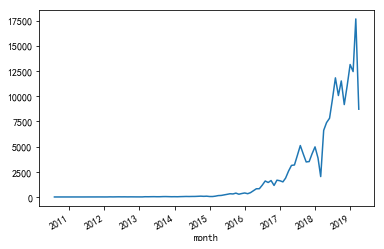

In [83]:
reviews.groupby('month').count().id.plot()

再次查看趋势图，发现评论数，总体上随时间逐步上升，尤其是2018年至2019年，爬升速度非常快，但2019年4月份有很大的下滑，考虑到该份数据最多只统计到2019年4月份，估计是未统计完全   
这也容易理解，随着时代的发展，网民人数也不断攀升，消费水平的上升也使居住酒店的人数逐步增加

## 制作用户评论关键字词云

In [89]:
from wordcloud import WordCloud
import jieba  #用于中文分词

In [102]:
text = str(reviews.comments)
#中文分词
text = ' '.join(jieba.cut(text))

In [106]:
wc = WordCloud(font_path='simsun.ttc', width=1600, height=800, mode='RGBA', background_color=None).generate(text)

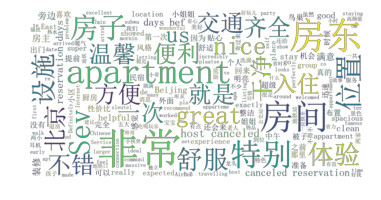

In [107]:
# 显示词云
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

从关键词来看：  
出现‘房东’一次较多，说明抛开房间本身，房东的个人形象也很影响用户的评价  
对于房间来说，'交通'、'位置'，这两个是对房间的第三方因素的主要考虑指标，'干净'、'温馨'、'设施齐全'等因素是对房间本身的主要评价指标  
总体来看，绝大多数评论都报以肯定的态度